In [1]:
import numpy as np
import pandas as pd

# Viz Library
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import show

# Plotly Lib
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [2]:
# Reading the Response Dataset
response = pd.read_csv('dataset/kaggle_survey_2020_responses.csv')
response = response.drop(response.index[0], axis = 0)

In [3]:
response.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
response.info

<bound method DataFrame.info of       Time from Start to Finish (seconds)     Q1     Q2  \
1                                    1838  35-39    Man   
2                                  289287  30-34    Man   
3                                     860  35-39    Man   
4                                     507  30-34    Man   
5                                      78  30-34    Man   
...                                   ...    ...    ...   
20032                                 126  18-21    Man   
20033                                 566  55-59  Woman   
20034                                 238  30-34    Man   
20035                                 625  22-24    Man   
20036                                1031  22-24    Man   

                                                      Q3  \
1                                               Colombia   
2                               United States of America   
3                                              Argentina   
4                  

In [5]:
response.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
count,20036,20036,20036,20036,19569,19277,19120,15530,4277,7535,...,1177,494,430,3199,557,480,846,519,3082,251
unique,5167,11,5,55,7,13,7,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,565,25-29,Man,India,Master’s degree,Student,3-5 years,Python,R,SQL,...,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,None,Other
freq,34,4011,15789,5851,7859,5171,4546,15530,4277,7535,...,1177,494,430,3199,557,480,846,519,3082,251


In [6]:
response.shape

(20036, 355)

***Question 1: Age Distribution***

In [7]:
data = response['Q1'].sort_values(ascending=True)

Text(0, 0.5, 'Percentage')

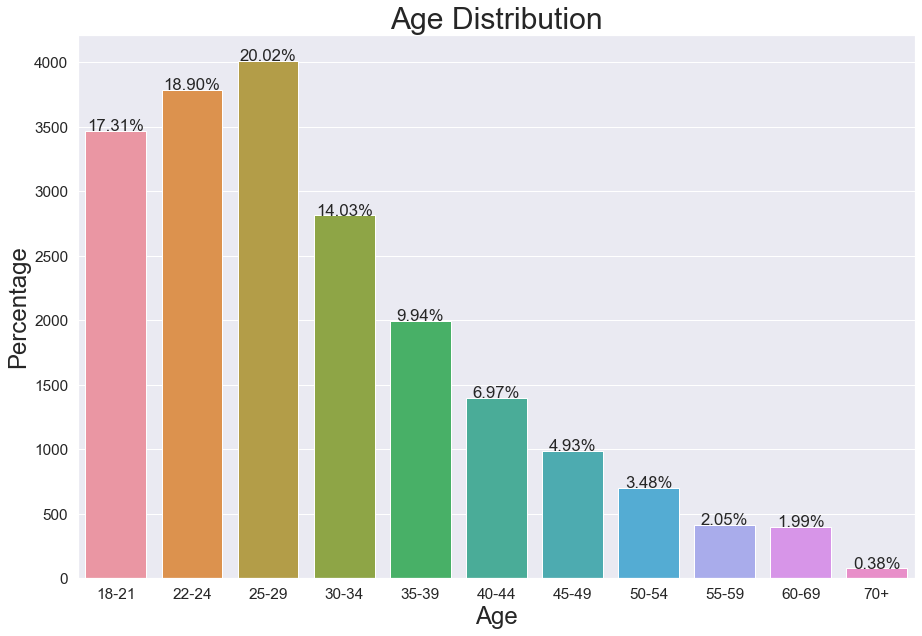

In [8]:
sns.set(font_scale=1.4)
sns.color_palette("tab10")
plt.figure(figsize=(15,10))

total = float(len(response)) # one person per row 

ax = sns.countplot(x = data, data = response)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 

plt.title('Age Distribution',
         fontsize =30)

plt.xlabel('Age', fontsize = 24)
plt.ylabel('Percentage', fontsize = 24)

***Question 2: Gender Identity of Data Scientist***

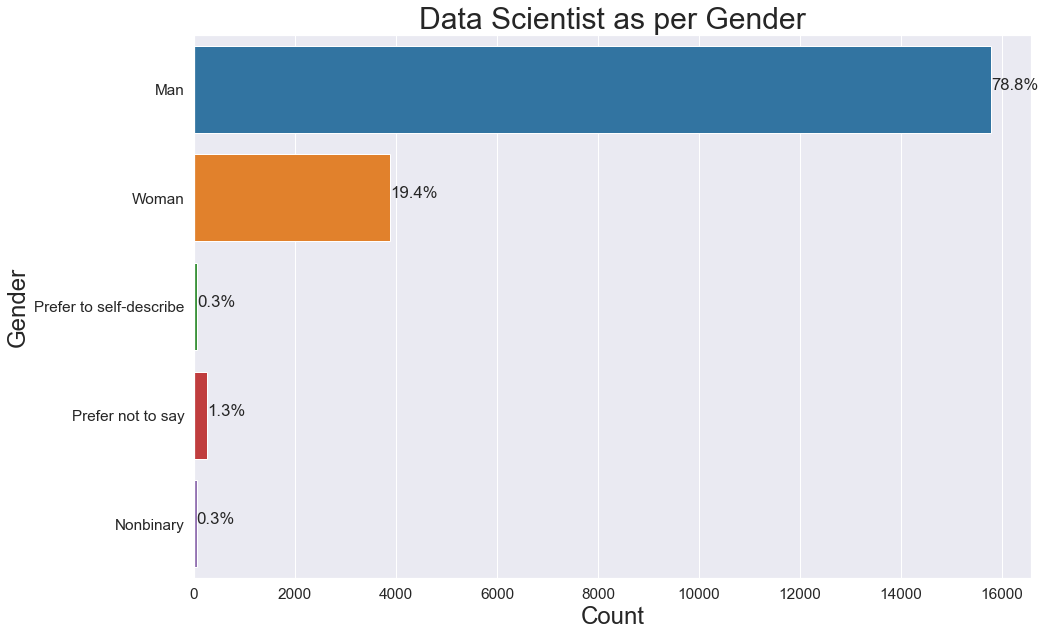

In [9]:
sns.set(font_scale=1.4)
plt.figure(figsize=(15,10))

ax = sns.countplot(y = "Q2", data = response, palette = "tab10")

plt.title('Gender Distribution')
plt.xlabel('Frequencies')

total = len(response['Q2'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Data Scientist as per Gender',
         fontsize =30)

plt.xlabel('Count', fontsize = 24)
plt.ylabel('Gender', fontsize = 24)

plt.show()

***Question 3: In which country do you currently reside ?***

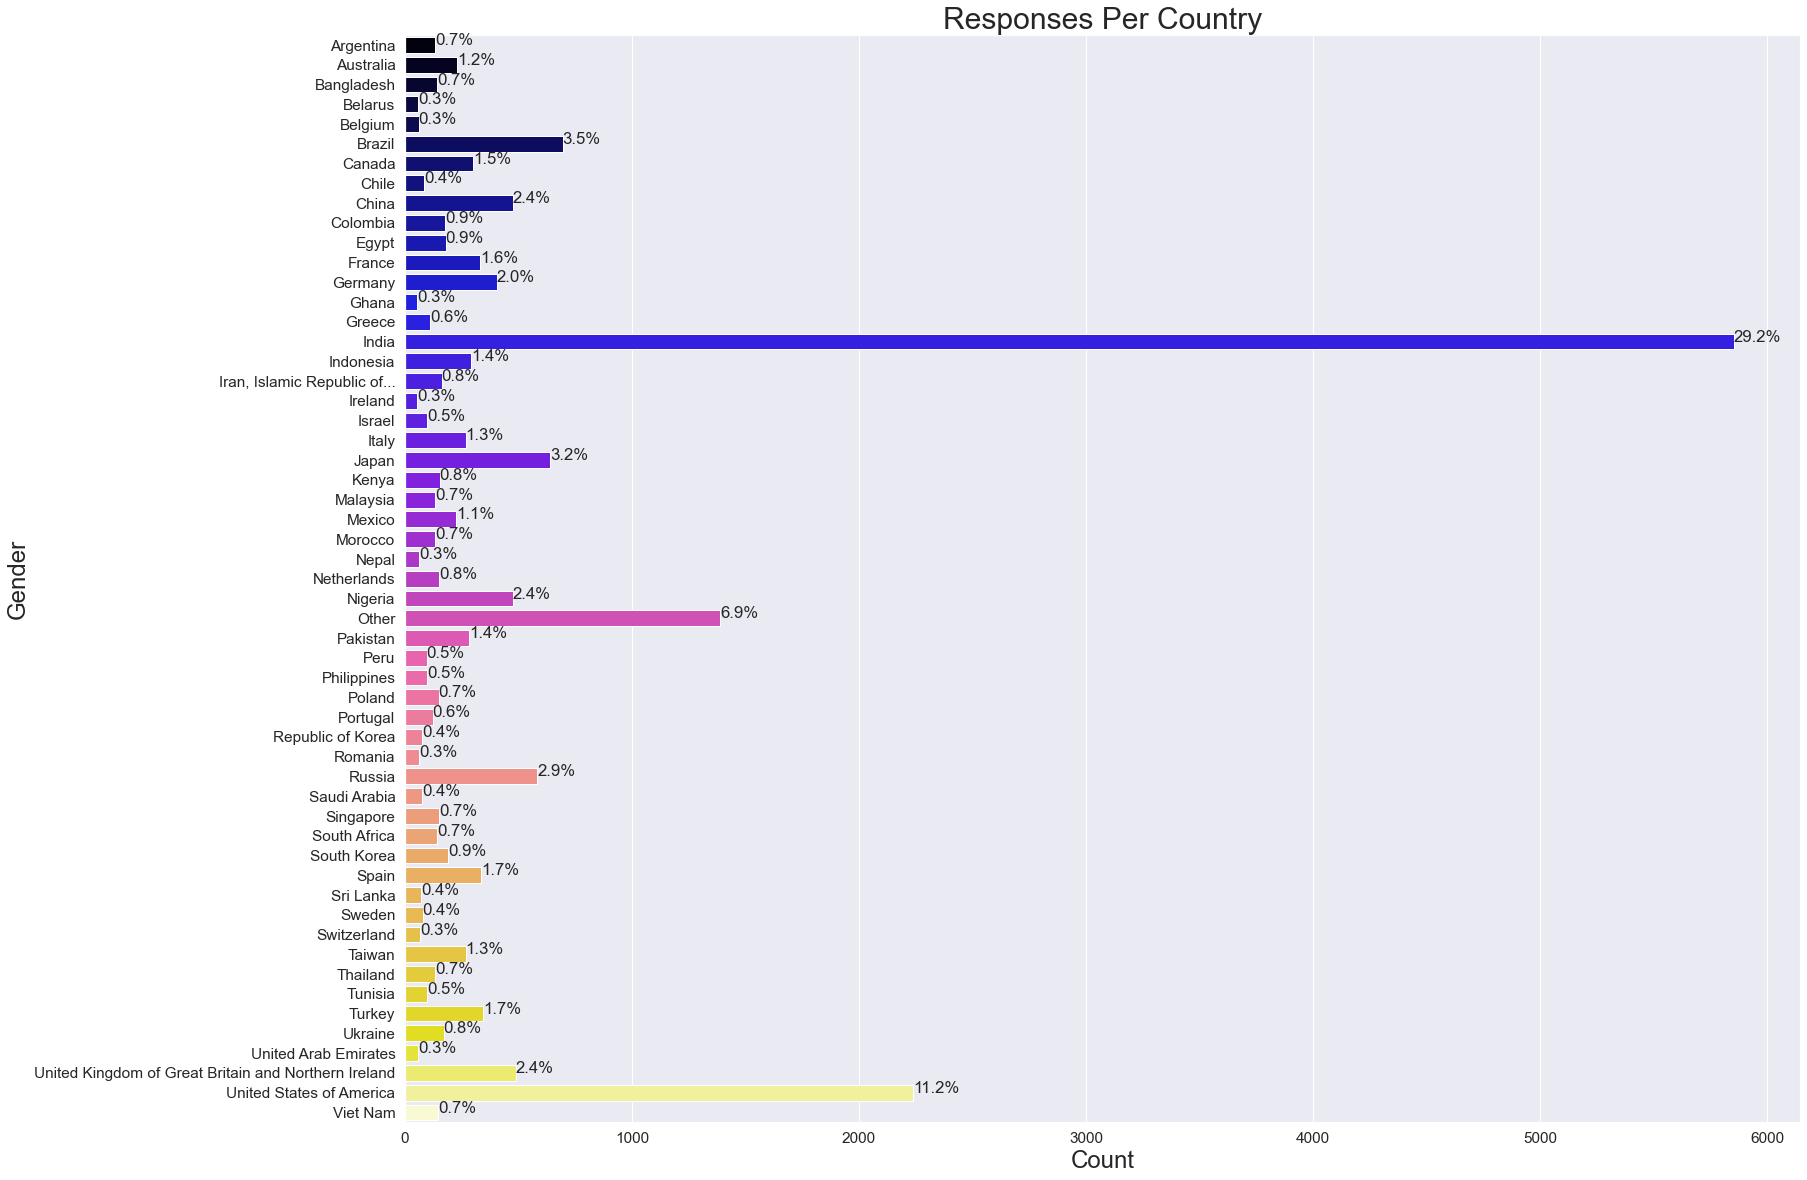

In [10]:
sns.set(font_scale=1.4)
plt.figure(figsize=(25,20))

data = response['Q3'].sort_values(ascending=True)

ax = sns.countplot(y = data, data = response, palette = "gnuplot2")

total = len(response['Q3'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Responses Per Country',
         fontsize =30)

plt.xlabel('Count', fontsize = 24)
plt.ylabel('Gender', fontsize = 24)

plt.show()

***Question 4: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?***

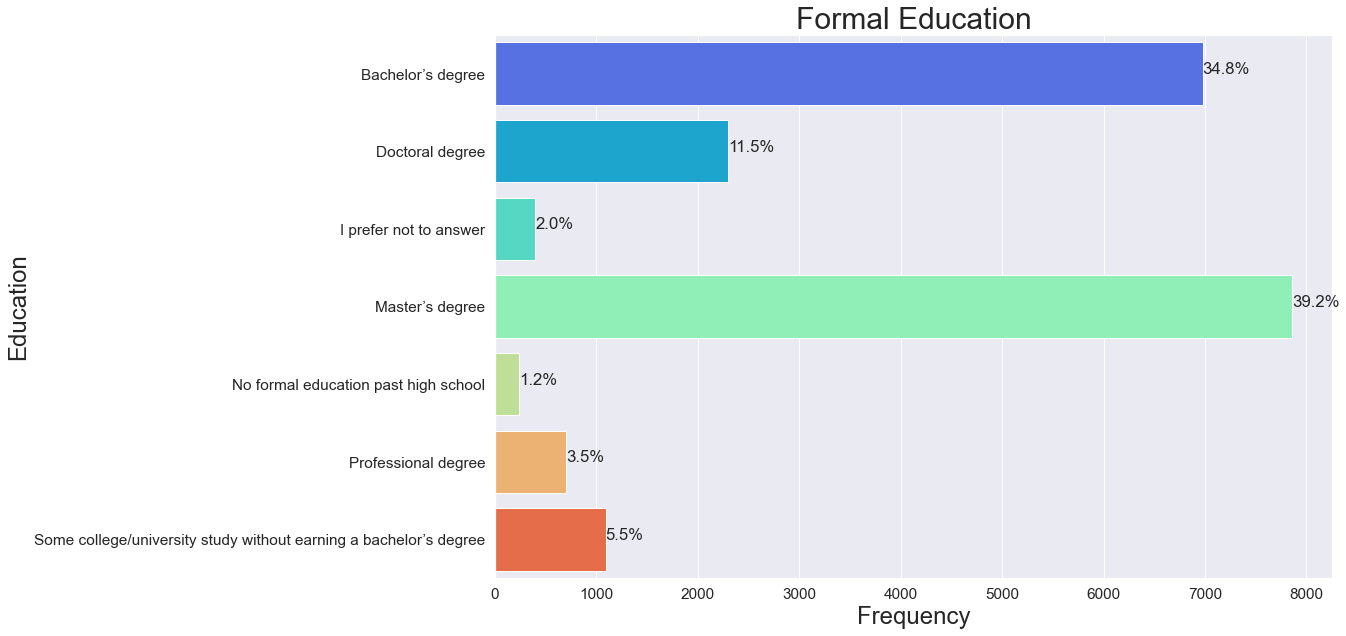

In [11]:
sns.set(font_scale=1.4)
plt.figure(figsize=(15,10))

data = response['Q4'].sort_values(ascending=True)

ax = sns.countplot(y = data, data = response, palette = "rainbow")

total = len(response['Q4'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Formal Education',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Education', fontsize = 24)

plt.show()

***Question 5: Select the title most similar to your current role (or most recent title if retired)***

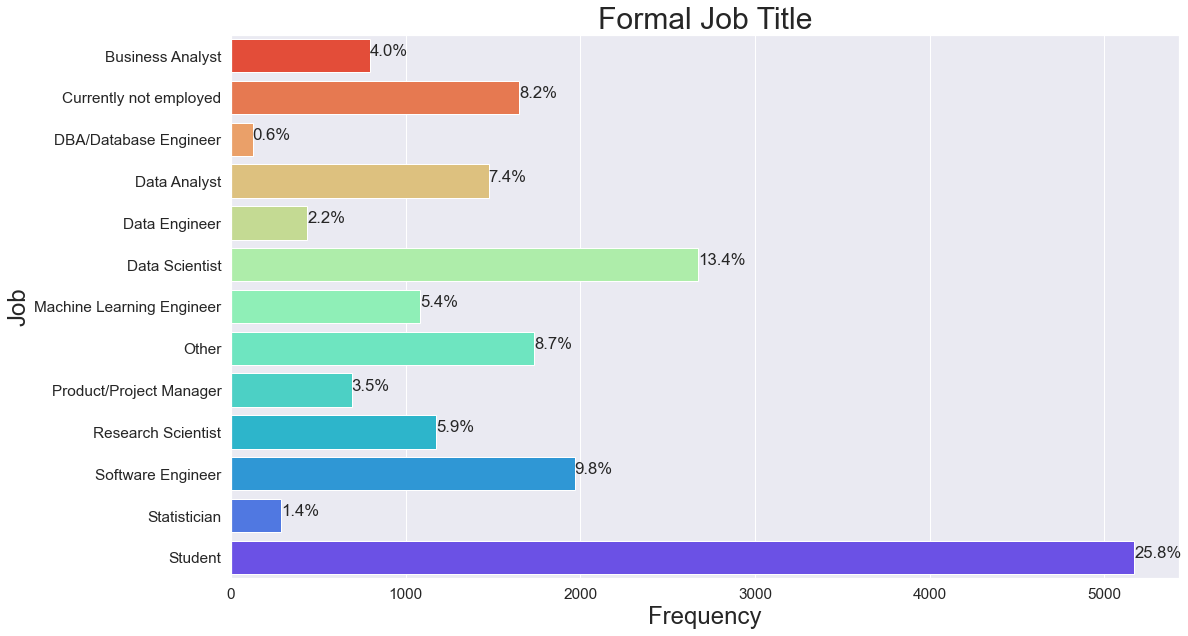

In [12]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

data = response['Q5'].sort_values(ascending=True)

ax = sns.countplot(y = data, data = response, palette = "rainbow_r")

total = len(response['Q5'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Formal Job Title',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Job', fontsize = 24)

plt.show()

***Question 6: For how many years have you been writing code and/or programming?***

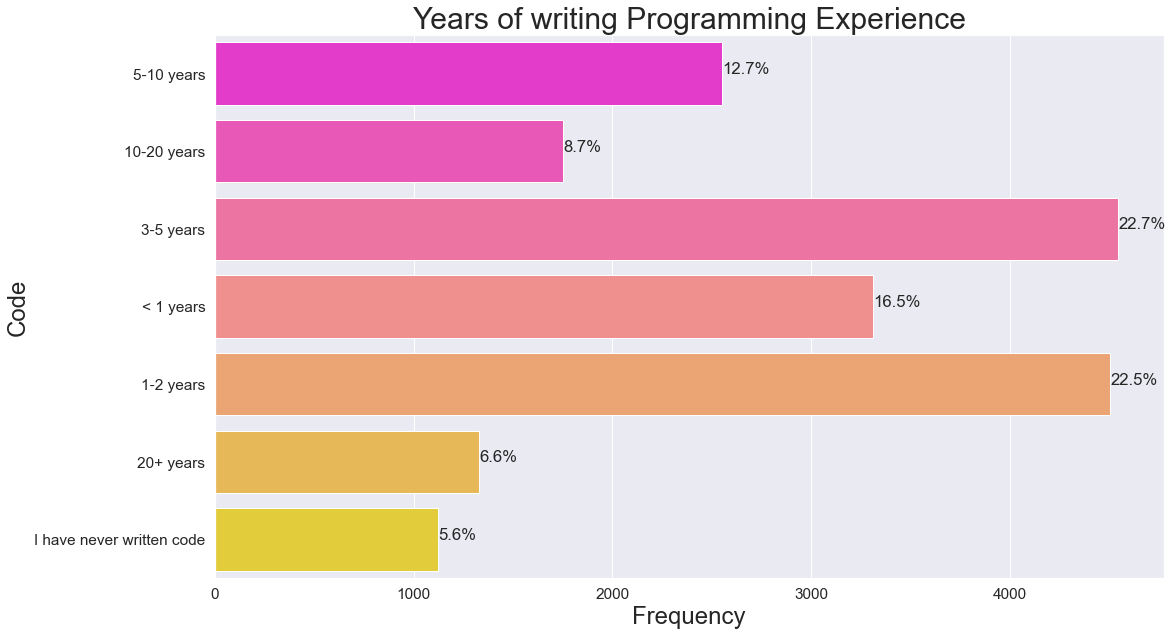

In [13]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = 'Q6', data = response, palette = "spring")

total = len(response['Q6'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Years of writing Programming Experience',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Code', fontsize = 24)

plt.show()

***Question 7: What programming languages do you use on a regular basis?***

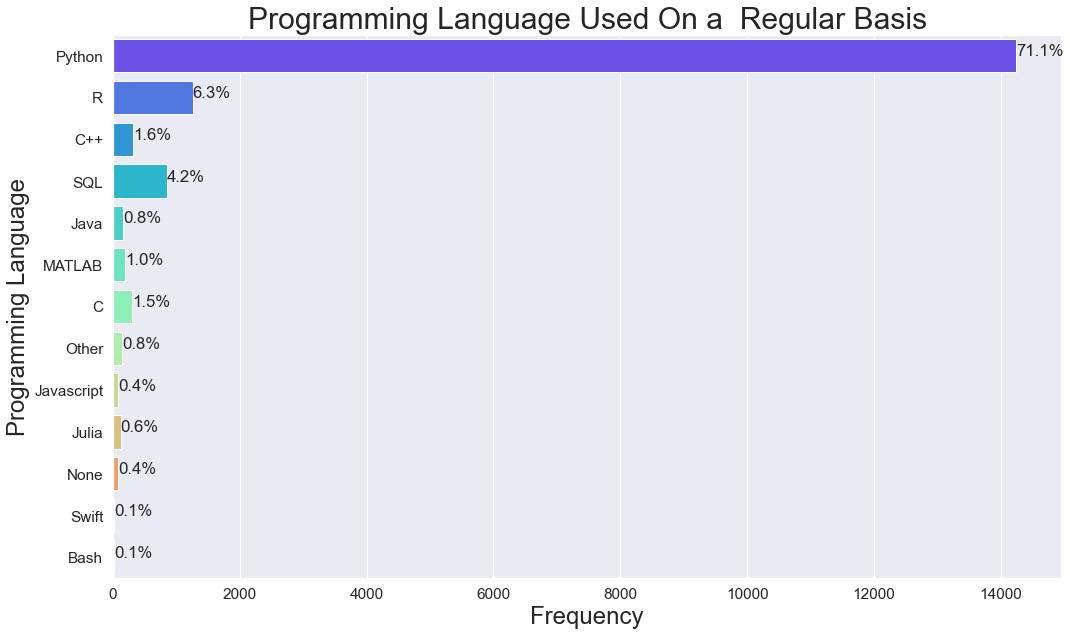

In [14]:
sns.set(font_scale=1.4)
plt.figure(figsize=(17,10))

ax = sns.countplot(y = 'Q8', data = response, palette = "rainbow")

total = len(response['Q8'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.title('Programming Language Used On a  Regular Basis',
         fontsize =30)

plt.xlabel('Frequency', fontsize = 24)
plt.ylabel('Programming Language', fontsize = 24)

plt.show()